In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-hotstar-tv-and-movie-catalog/hotstar.csv


In [2]:
df= pd.read_csv("/kaggle/input/disney-hotstar-tv-and-movie-catalog/hotstar.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6359 non-null   int64  
 1   title         6359 non-null   object 
 2   description   6359 non-null   object 
 3   genre         6359 non-null   object 
 4   year          6359 non-null   int64  
 5   age_rating    6359 non-null   object 
 6   running_time  4188 non-null   float64
 7   seasons       2171 non-null   float64
 8   episodes      2171 non-null   float64
 9   type          6359 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 496.9+ KB


In [4]:
df.head()

hotstar_id                                           title  \
0  1835064133                                        The Ring   
1  1260015636  Jesus: Rise To Power And Birth Of Christianity   
2  1000070418                                     Yama Muduru   
3  1770000804                           X-Men: The Last Stand   
4  1770005017             Mangalyaan: India's Mission To Mars   

                                         description        genre  year  \
0  Mutually divorced Aman emotionally struggles t...        Drama  2021   
1  A journey across the historic landscapes of th...  Documentary  2019   
2  Krishna Kumar is popular in college for his mu...        Drama  2009   
3  When humans find a cure for mutation, Professo...    Superhero  2006   
4  In this special, watch the 650 million km jour...  Documentary  2017   

  age_rating  running_time  seasons  episodes   type  
0    U/A 13+          17.0      NaN       NaN  movie  
1    U/A 13+          42.0      NaN       NaN  movie  
2    U/A 13+         129.0      NaN       NaN  movie  
3    U/A 13+         103.0      NaN       NaN  movie  
4          U          44.0      NaN       NaN  movie

In [5]:
df.set_index("hotstar_id",inplace=True)
df.head()

title  \
hotstar_id                                                   
1835064133                                        The Ring   
1260015636  Jesus: Rise To Power And Birth Of Christianity   
1000070418                                     Yama Muduru   
1770000804                           X-Men: The Last Stand   
1770005017             Mangalyaan: India's Mission To Mars   

                                                  description        genre  \
hotstar_id                                                                   
1835064133  Mutually divorced Aman emotionally struggles t...        Drama   
1260015636  A journey across the historic landscapes of th...  Documentary   
1000070418  Krishna Kumar is popular in college for his mu...        Drama   
1770000804  When humans find a cure for mutation, Professo...    Superhero   
1770005017  In this special, watch the 650 million km jour...  Documentary   

            year age_rating  running_time  seasons  episodes   type  
hotstar_id                                                           
1835064133  2021    U/A 13+          17.0      NaN       NaN  movie  
1260015636  2019    U/A 13+          42.0      NaN       NaN  movie  
1000070418  2009    U/A 13+         129.0      NaN       NaN  movie  
1770000804  2006    U/A 13+         103.0      NaN       NaN  movie  
1770005017  2017          U          44.0      NaN       NaN  movie

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

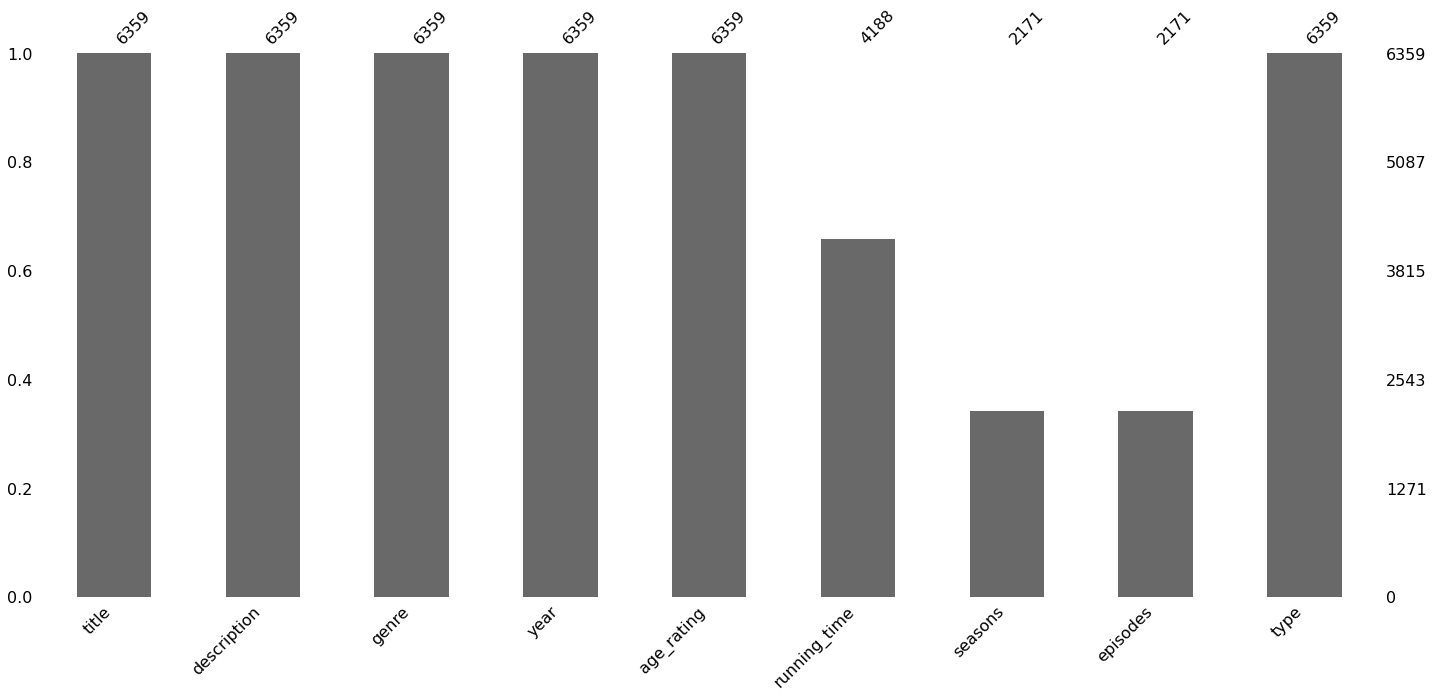

In [7]:
import missingno as msn
msn.bar(df)

In [8]:
df["seasons"].unique()

array([nan, 13.,  1.,  3.,  7.,  2., 10.,  5.,  4., 33.,  9.,  6.,  8.,
       43., 18., 17., 23., 21., 16., 14., 28., 11., 12., 36., 53., 73.,
       24., 27., 35., 22., 15., 19., 34., 45., 67., 20., 29., 25., 38.,
       30., 31., 26.])

In [9]:
df["type"].unique()

array(['movie', 'tv'], dtype=object)

In [10]:
df["genre"].unique()

array(['Drama', 'Documentary', 'Superhero', 'Musical', 'Romance',
       'Family', 'Action', 'Kids', 'Comedy', 'Thriller', 'Crime',
       'Horror', 'Mythology', 'Animals & Nature', 'Adventure',
       'Animation', 'Mystery', 'Science Fiction', 'Historical',
       'Standup Comedy', 'Teen', 'Fantasy', 'Science', 'Concert Film',
       'Shorts', 'Docudrama', 'Biopic', 'Reality', 'Sport', 'Travel',
       'Food', 'Talk Show', 'Awards', 'Kabaddi', 'Lifestyle', 'Football'],
      dtype=object)

In [11]:
df["age_rating"].unique()

array(['U/A 13+', 'U', 'U/A 7+', 'U/A 16+', 'A', 'PG', 'G', '15+',
       'Kannada', 'English', '12+', 'Star Sports Kannada 1', 'Telugu',
       'Star Sports 1 Telugu', 'Marathi', 'Star Suvarna', 'Hindi',
       'Star Sports 1 Marathi', 'Star Vijay', 'Star Sports 2', 'Tamil',
       'Star Sports Hindi 1'], dtype=object)

Dropping rows which are containing language in age_rating

In [12]:
df.shape

(6359, 9)

In [13]:
df.drop(df.index[df['age_rating'] == 'English'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Kannada'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Tamil'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Telugu'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Hindi'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Marathi'], inplace=True)
df.shape

(6345, 9)

In [14]:
df.head()

title  \
hotstar_id                                                   
1835064133                                        The Ring   
1260015636  Jesus: Rise To Power And Birth Of Christianity   
1000070418                                     Yama Muduru   
1770000804                           X-Men: The Last Stand   
1770005017             Mangalyaan: India's Mission To Mars   

                                                  description        genre  \
hotstar_id                                                                   
1835064133  Mutually divorced Aman emotionally struggles t...        Drama   
1260015636  A journey across the historic landscapes of th...  Documentary   
1000070418  Krishna Kumar is popular in college for his mu...        Drama   
1770000804  When humans find a cure for mutation, Professo...    Superhero   
1770005017  In this special, watch the 650 million km jour...  Documentary   

            year age_rating  running_time  seasons  episodes   type  
hotstar_id                                                           
1835064133  2021    U/A 13+          17.0      NaN       NaN  movie  
1260015636  2019    U/A 13+          42.0      NaN       NaN  movie  
1000070418  2009    U/A 13+         129.0      NaN       NaN  movie  
1770000804  2006    U/A 13+         103.0      NaN       NaN  movie  
1770005017  2017          U          44.0      NaN       NaN  movie

Since seasons, running time and episodes are exact data and cannot/should not be estimated, there is no other choice but to drop these

In [15]:
df.dropna(axis=1,inplace=True)
df.head()

title  \
hotstar_id                                                   
1835064133                                        The Ring   
1260015636  Jesus: Rise To Power And Birth Of Christianity   
1000070418                                     Yama Muduru   
1770000804                           X-Men: The Last Stand   
1770005017             Mangalyaan: India's Mission To Mars   

                                                  description        genre  \
hotstar_id                                                                   
1835064133  Mutually divorced Aman emotionally struggles t...        Drama   
1260015636  A journey across the historic landscapes of th...  Documentary   
1000070418  Krishna Kumar is popular in college for his mu...        Drama   
1770000804  When humans find a cure for mutation, Professo...    Superhero   
1770005017  In this special, watch the 650 million km jour...  Documentary   

            year age_rating   type  
hotstar_id                          
1835064133  2021    U/A 13+  movie  
1260015636  2019    U/A 13+  movie  
1000070418  2009    U/A 13+  movie  
1770000804  2006    U/A 13+  movie  
1770005017  2017          U  movie

In [16]:
df.shape

(6345, 6)

Now onto analysis-
First let us see the time frame of the data

In [17]:
print(min(df["year"]))
print(max(df["year"]))

1928
2022


In [18]:
pd.set_option("display.max_rows",5000)

In [19]:
df["year"].value_counts()

2017    517
2021    510
2019    510
2018    453
2020    432
2016    412
2015    346
2022    267
2014    236
2013    209
2010    203
2011    196
2009    175
2012    173
2008    157
2007    139
2005    121
2006    104
2004     66
1997     60
2003     58
2002     55
1992     53
1998     53
1999     53
2001     50
1990     46
2000     45
1991     43
1996     43
1995     38
1994     38
1993     36
1985     34
1988     33
1986     32
1989     27
1987     27
1982     23
1981     21
1983     19
1984     17
1977     17
1980     15
1978     15
1973     15
1979     14
1972     13
1971     11
1974     11
1965     10
1969      9
1964      7
1976      7
1967      7
1970      7
1968      6
1975      6
1959      5
1966      5
1941      5
1963      3
1962      3
1957      3
1961      3
1953      3
1956      2
1940      2
1947      2
1955      2
1928      1
1937      1
1958      1
1950      1
1951      1
1960      1
1942      1
Name: year, dtype: int64

In [20]:
sum(df[df["year"]<=2015].value_counts())

3244

In [21]:
sum(df[df["year"]>2015].value_counts())

3101

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

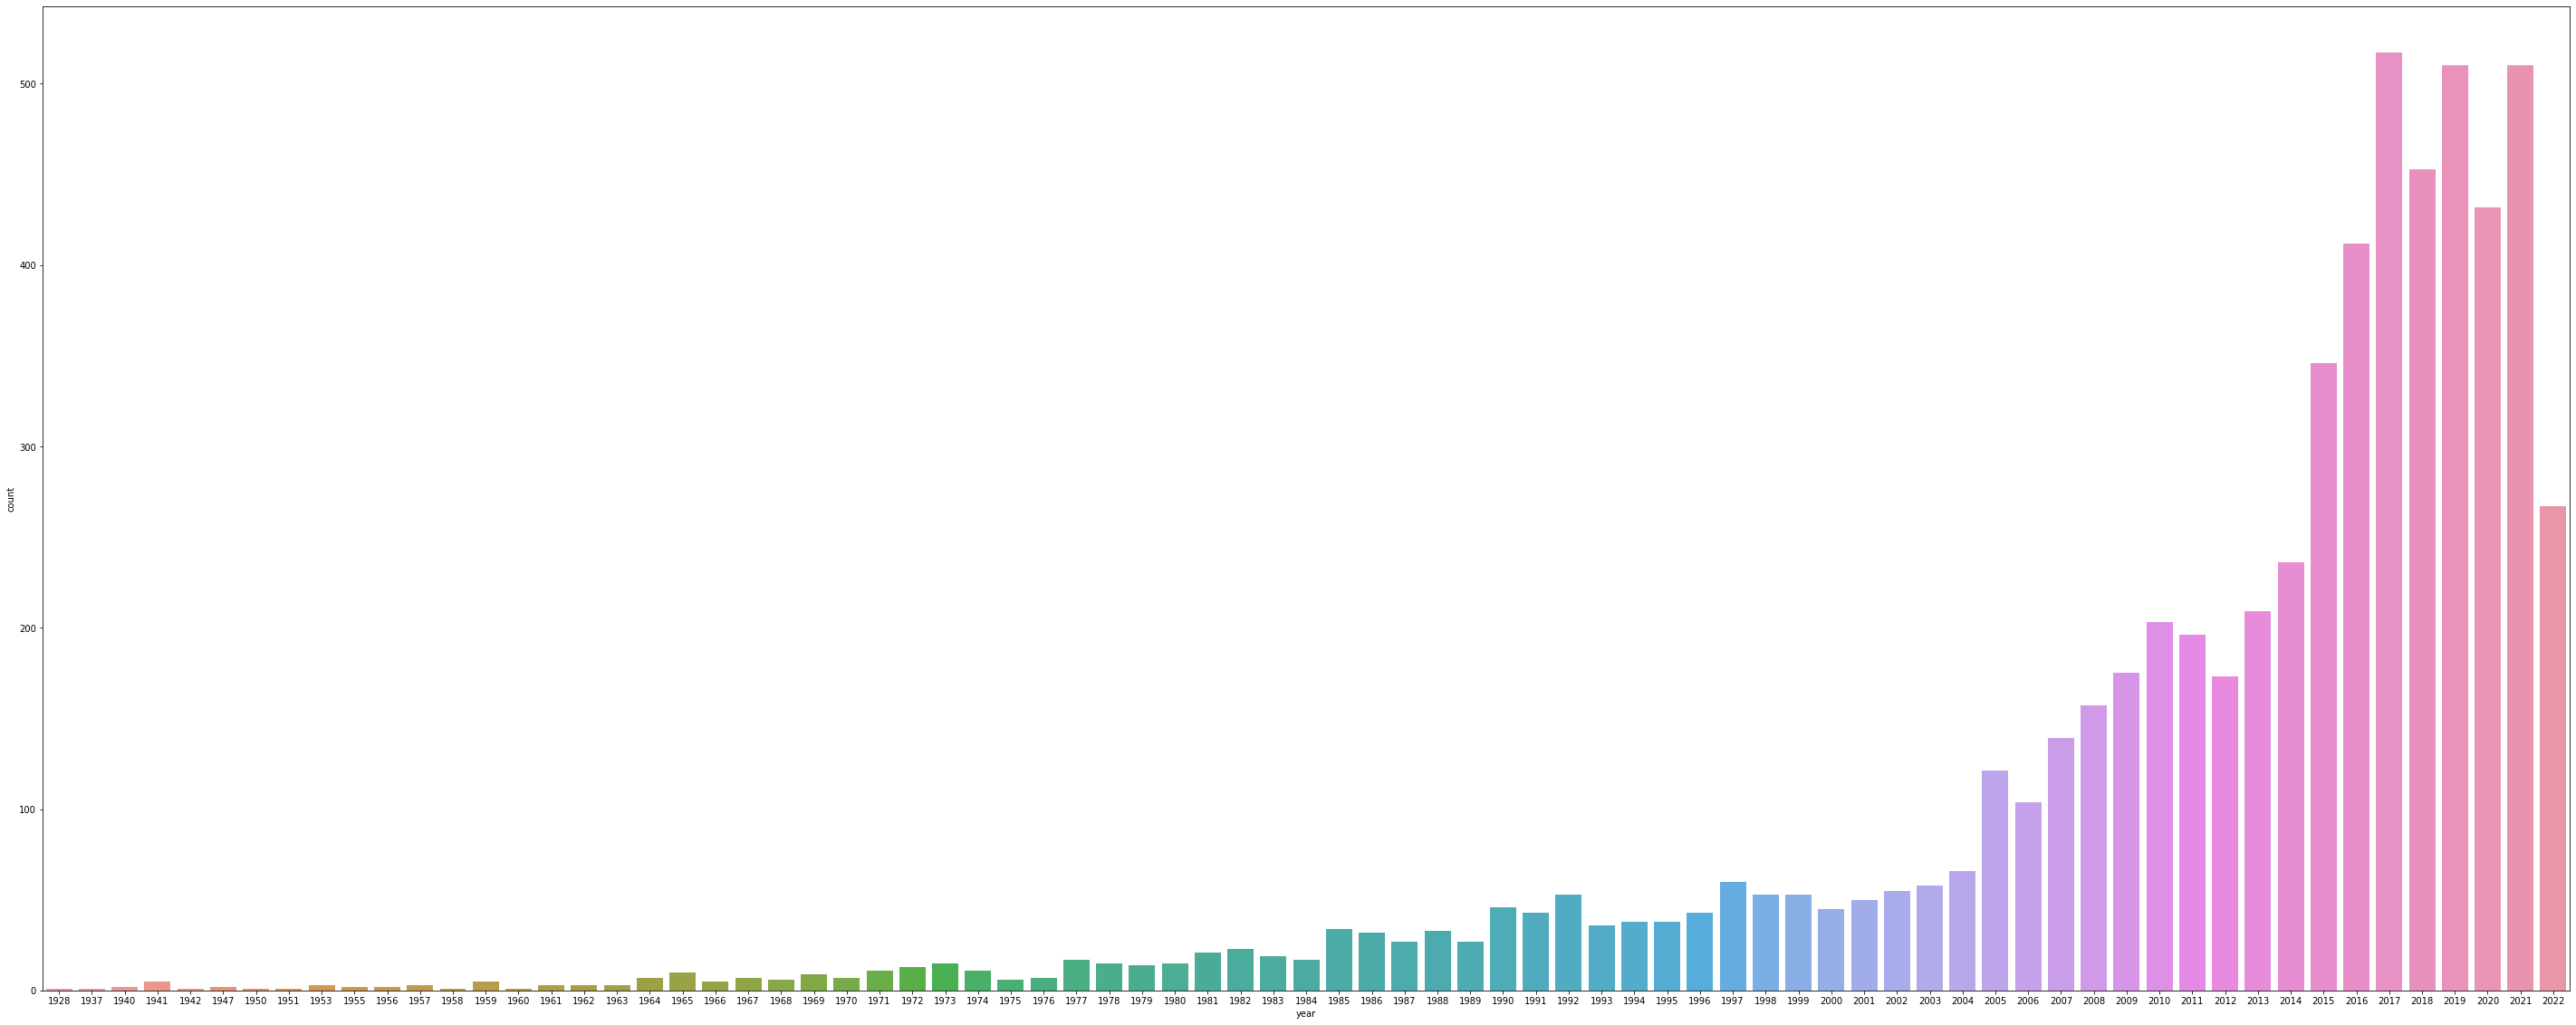

In [22]:
plt.figure(figsize=(50,20))
sns.countplot(df["year"])

This shows that all movies and series data availabe till 2015 is almost equal to all the data available after year 2015. This remarks the growth of production of movies and series from the year 2015
So, we are gonna divide the dataset in 2 eras 

In [23]:
def era(num):
    if num<=2015:
        return 1
    else:
        return 2
df["era"]=df["year"].apply(era)
df.head()

title  \
hotstar_id                                                   
1835064133                                        The Ring   
1260015636  Jesus: Rise To Power And Birth Of Christianity   
1000070418                                     Yama Muduru   
1770000804                           X-Men: The Last Stand   
1770005017             Mangalyaan: India's Mission To Mars   

                                                  description        genre  \
hotstar_id                                                                   
1835064133  Mutually divorced Aman emotionally struggles t...        Drama   
1260015636  A journey across the historic landscapes of th...  Documentary   
1000070418  Krishna Kumar is popular in college for his mu...        Drama   
1770000804  When humans find a cure for mutation, Professo...    Superhero   
1770005017  In this special, watch the 650 million km jour...  Documentary   

            year age_rating   type  era  
hotstar_id                               
1835064133  2021    U/A 13+  movie    2  
1260015636  2019    U/A 13+  movie    2  
1000070418  2009    U/A 13+  movie    1  
1770000804  2006    U/A 13+  movie    1  
1770005017  2017          U  movie    2

Now, we are gonna pick up a feature one by one and do its analysis. I aim to keep analysis in 3 parts, overall, era 1(before 2016) and era 2(2016 onwards). For ease, lets divide the dataset beforehand to avoid writing long and conditional commands in future

In [24]:
df1=df[df["year"]<=2015]
print(df1.shape)
df1.head()

(3244, 7)


title  \
hotstar_id                          
1000070418            Yama Muduru   
1770000804  X-Men: The Last Stand   
1000115927                 Rambha   
1000109207        Pyaar Ka Saagar   
1000159295      Kaada Beladingalu   

                                                  description      genre  \
hotstar_id                                                                 
1000070418  Krishna Kumar is popular in college for his mu...      Drama   
1770000804  When humans find a cure for mutation, Professo...  Superhero   
1000115927  Newlyweds Srikanth and Ramya rent a flat. The ...    Romance   
1000109207  After his parents die, Bishen takes it upon hi...     Family   
1000159295  While on an assignment, journalist Sudheshene ...      Drama   

            year age_rating   type  era  
hotstar_id                               
1000070418  2009    U/A 13+  movie    1  
1770000804  2006    U/A 13+  movie    1  
1000115927  2006    U/A 16+  movie    1  
1000109207  1961          U  movie    1  
1000159295  2007     U/A 7+  movie    1

In [25]:
df2=df[df["year"]>2015]
print(df2.shape)
df2.head()

(3101, 7)


title  \
hotstar_id                                                   
1835064133                                        The Ring   
1260015636  Jesus: Rise To Power And Birth Of Christianity   
1770005017             Mangalyaan: India's Mission To Mars   
1260050137                    The Disney Holiday Singalong   
1260013109                             Gaddalakonda Ganesh   

                                                  description        genre  \
hotstar_id                                                                   
1835064133  Mutually divorced Aman emotionally struggles t...        Drama   
1260015636  A journey across the historic landscapes of th...  Documentary   
1770005017  In this special, watch the 650 million km jour...  Documentary   
1260050137  Hosted by Ryan Seacrest, the jolly event full ...      Musical   
1260013109  An aspiring filmmaker secretly attempts to cap...       Action   

            year age_rating   type  era  
hotstar_id                               
1835064133  2021    U/A 13+  movie    2  
1260015636  2019    U/A 13+  movie    2  
1770005017  2017          U  movie    2  
1260050137  2020     U/A 7+  movie    2  
1260013109  2019    U/A 13+  movie    2

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

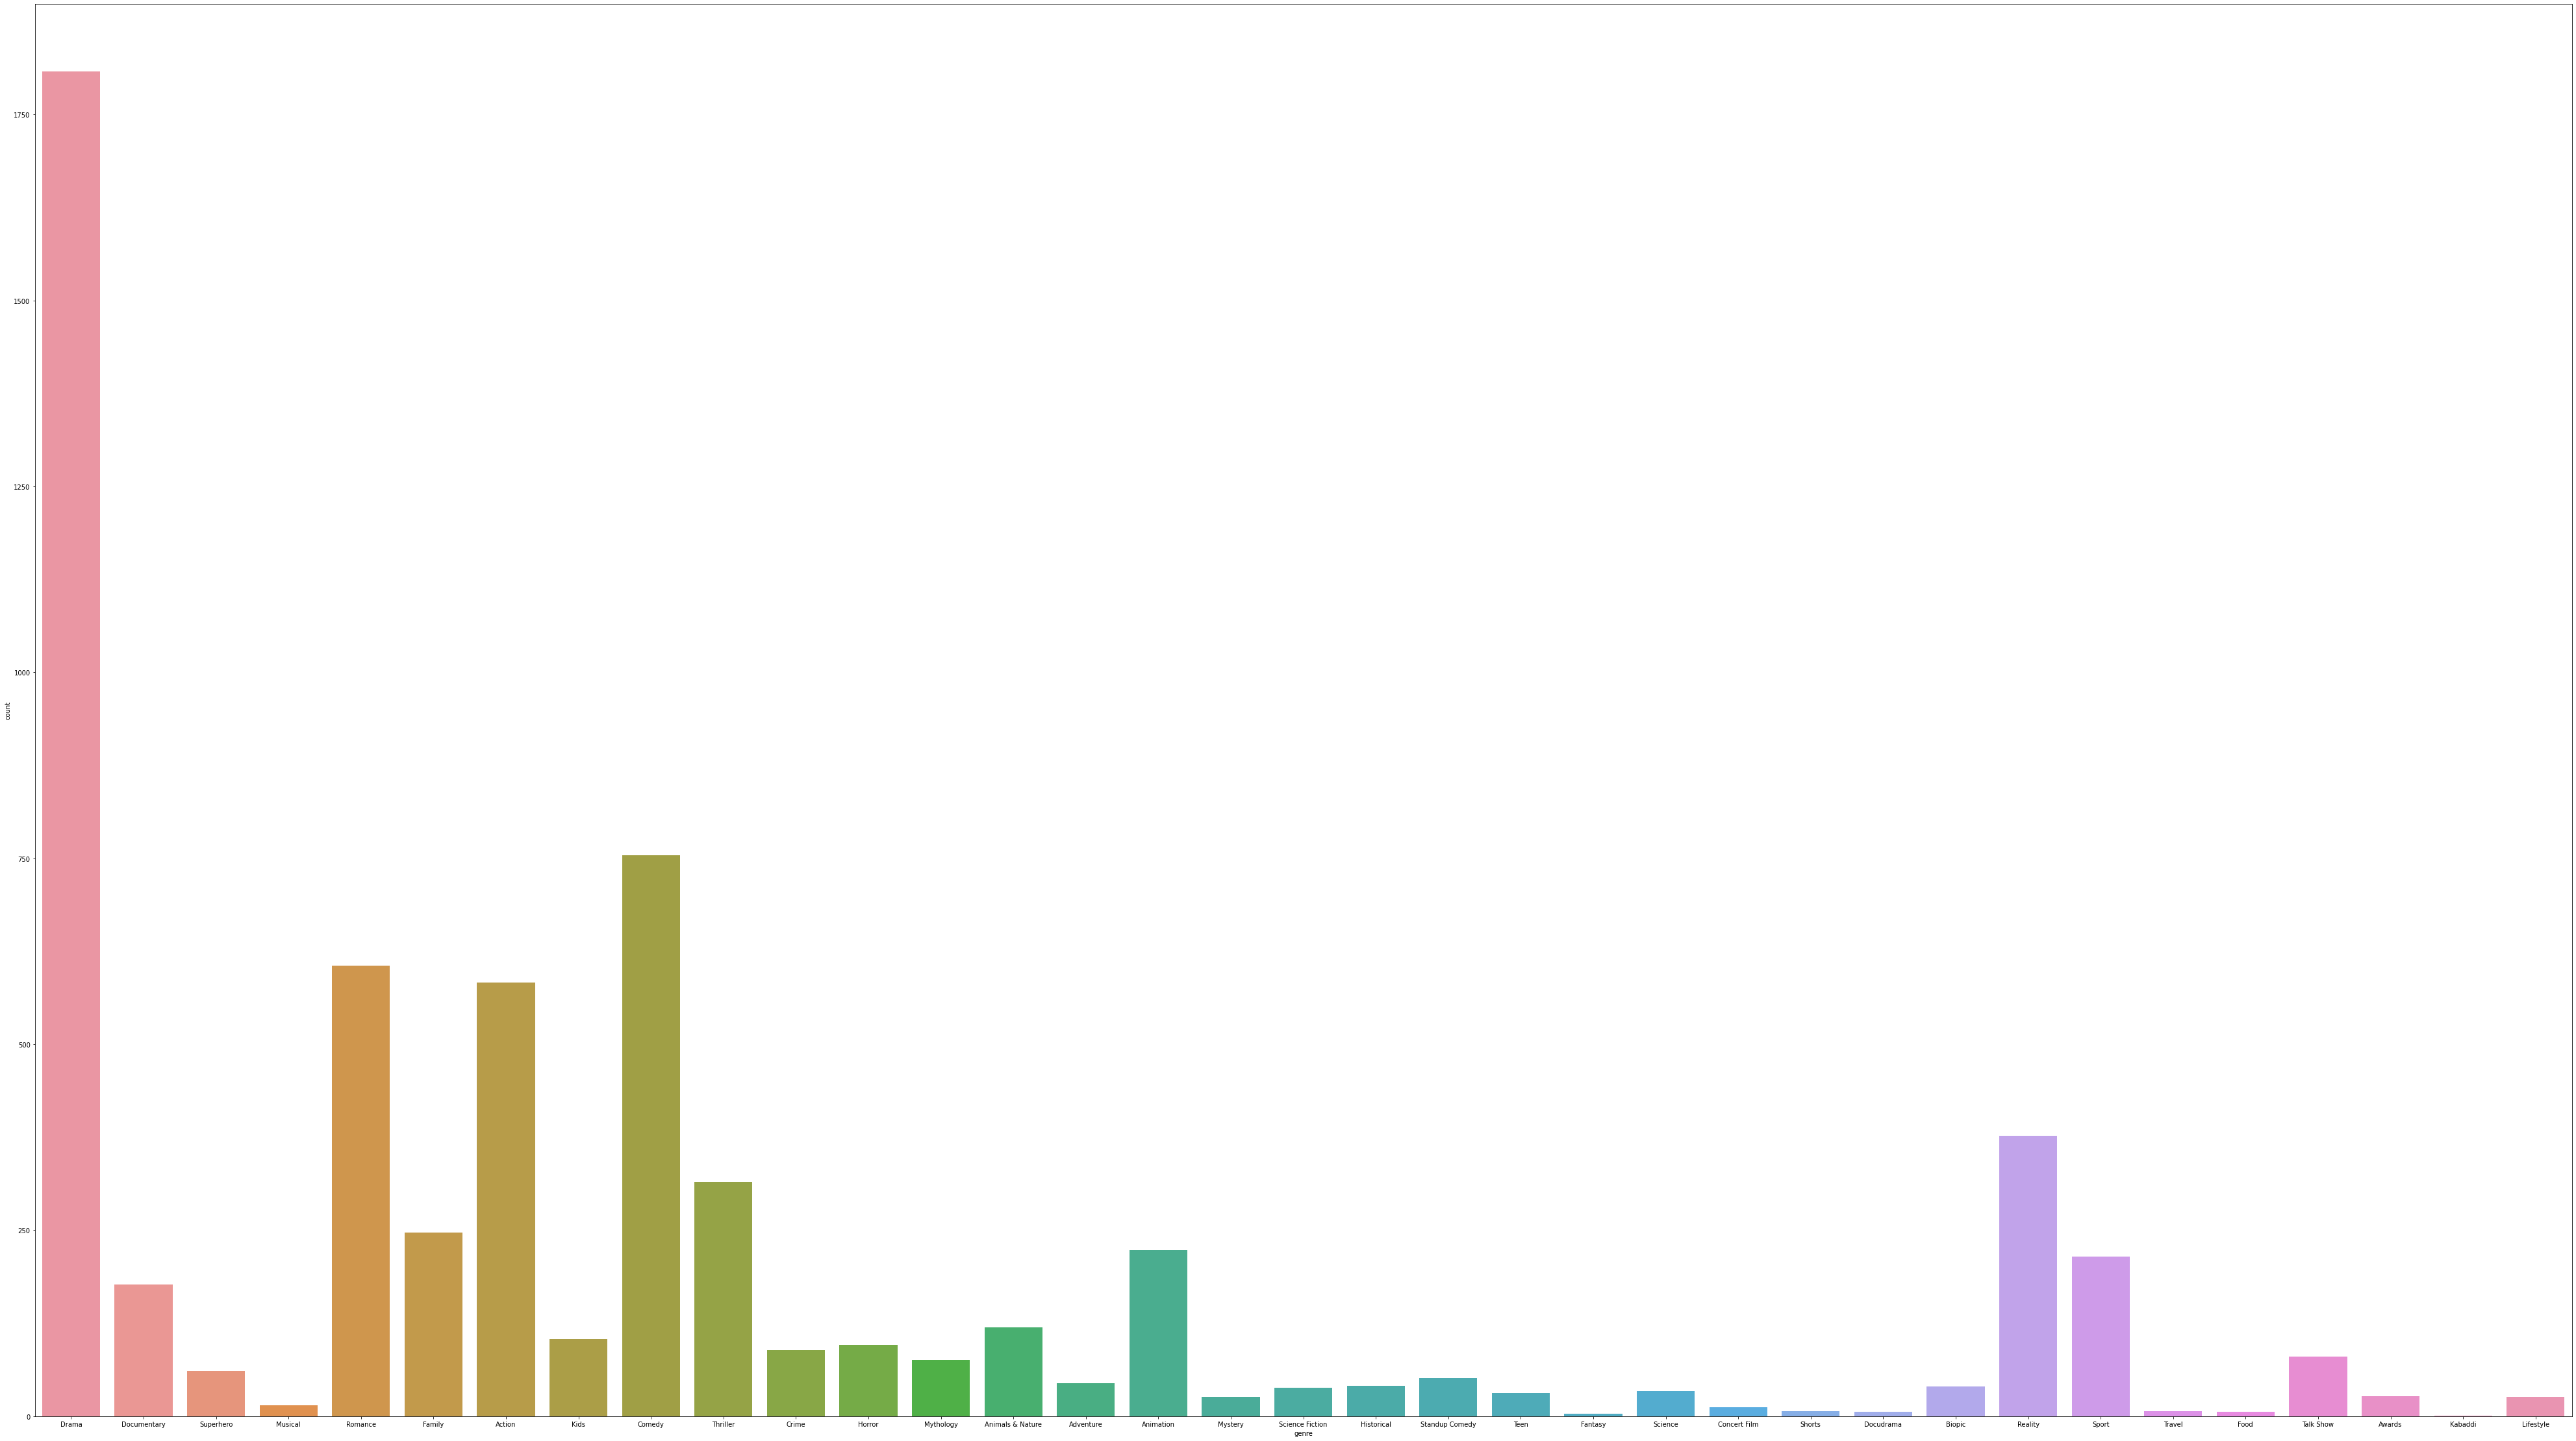

In [26]:
plt.figure(figsize=(70,40))
sns.countplot(df["genre"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

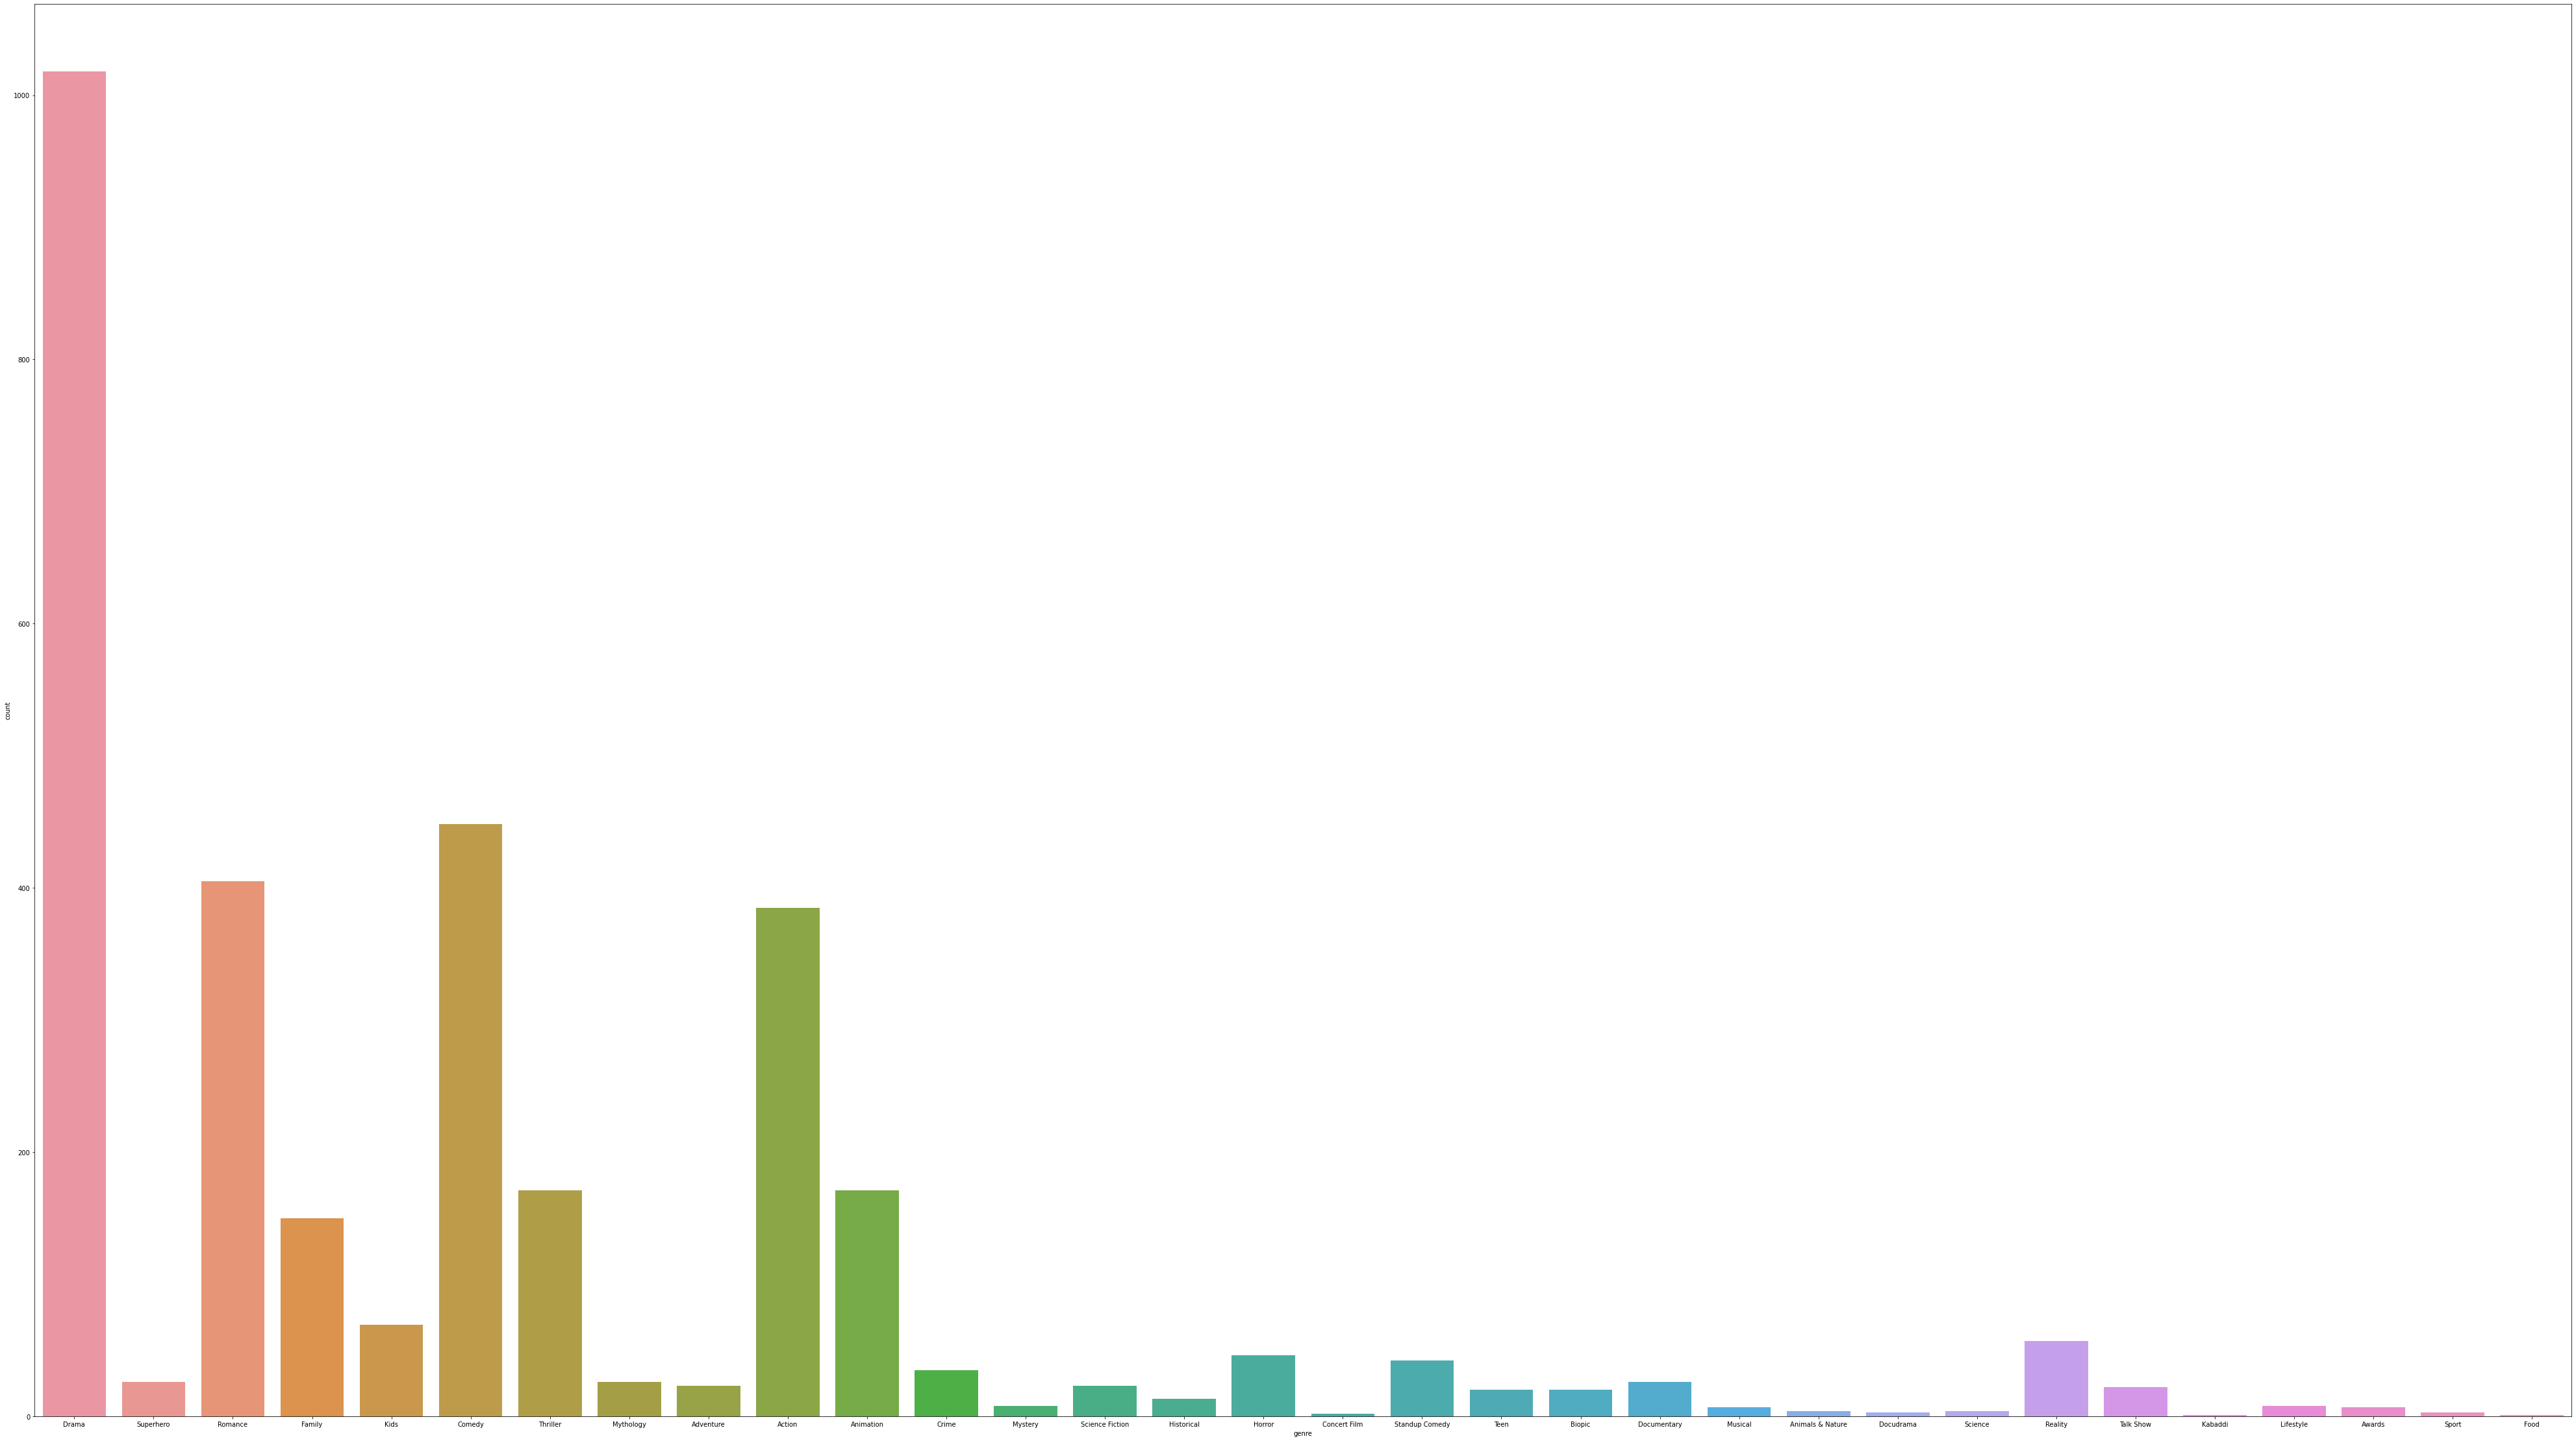

In [27]:
plt.figure(figsize=(70,40))
sns.countplot(df1["genre"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

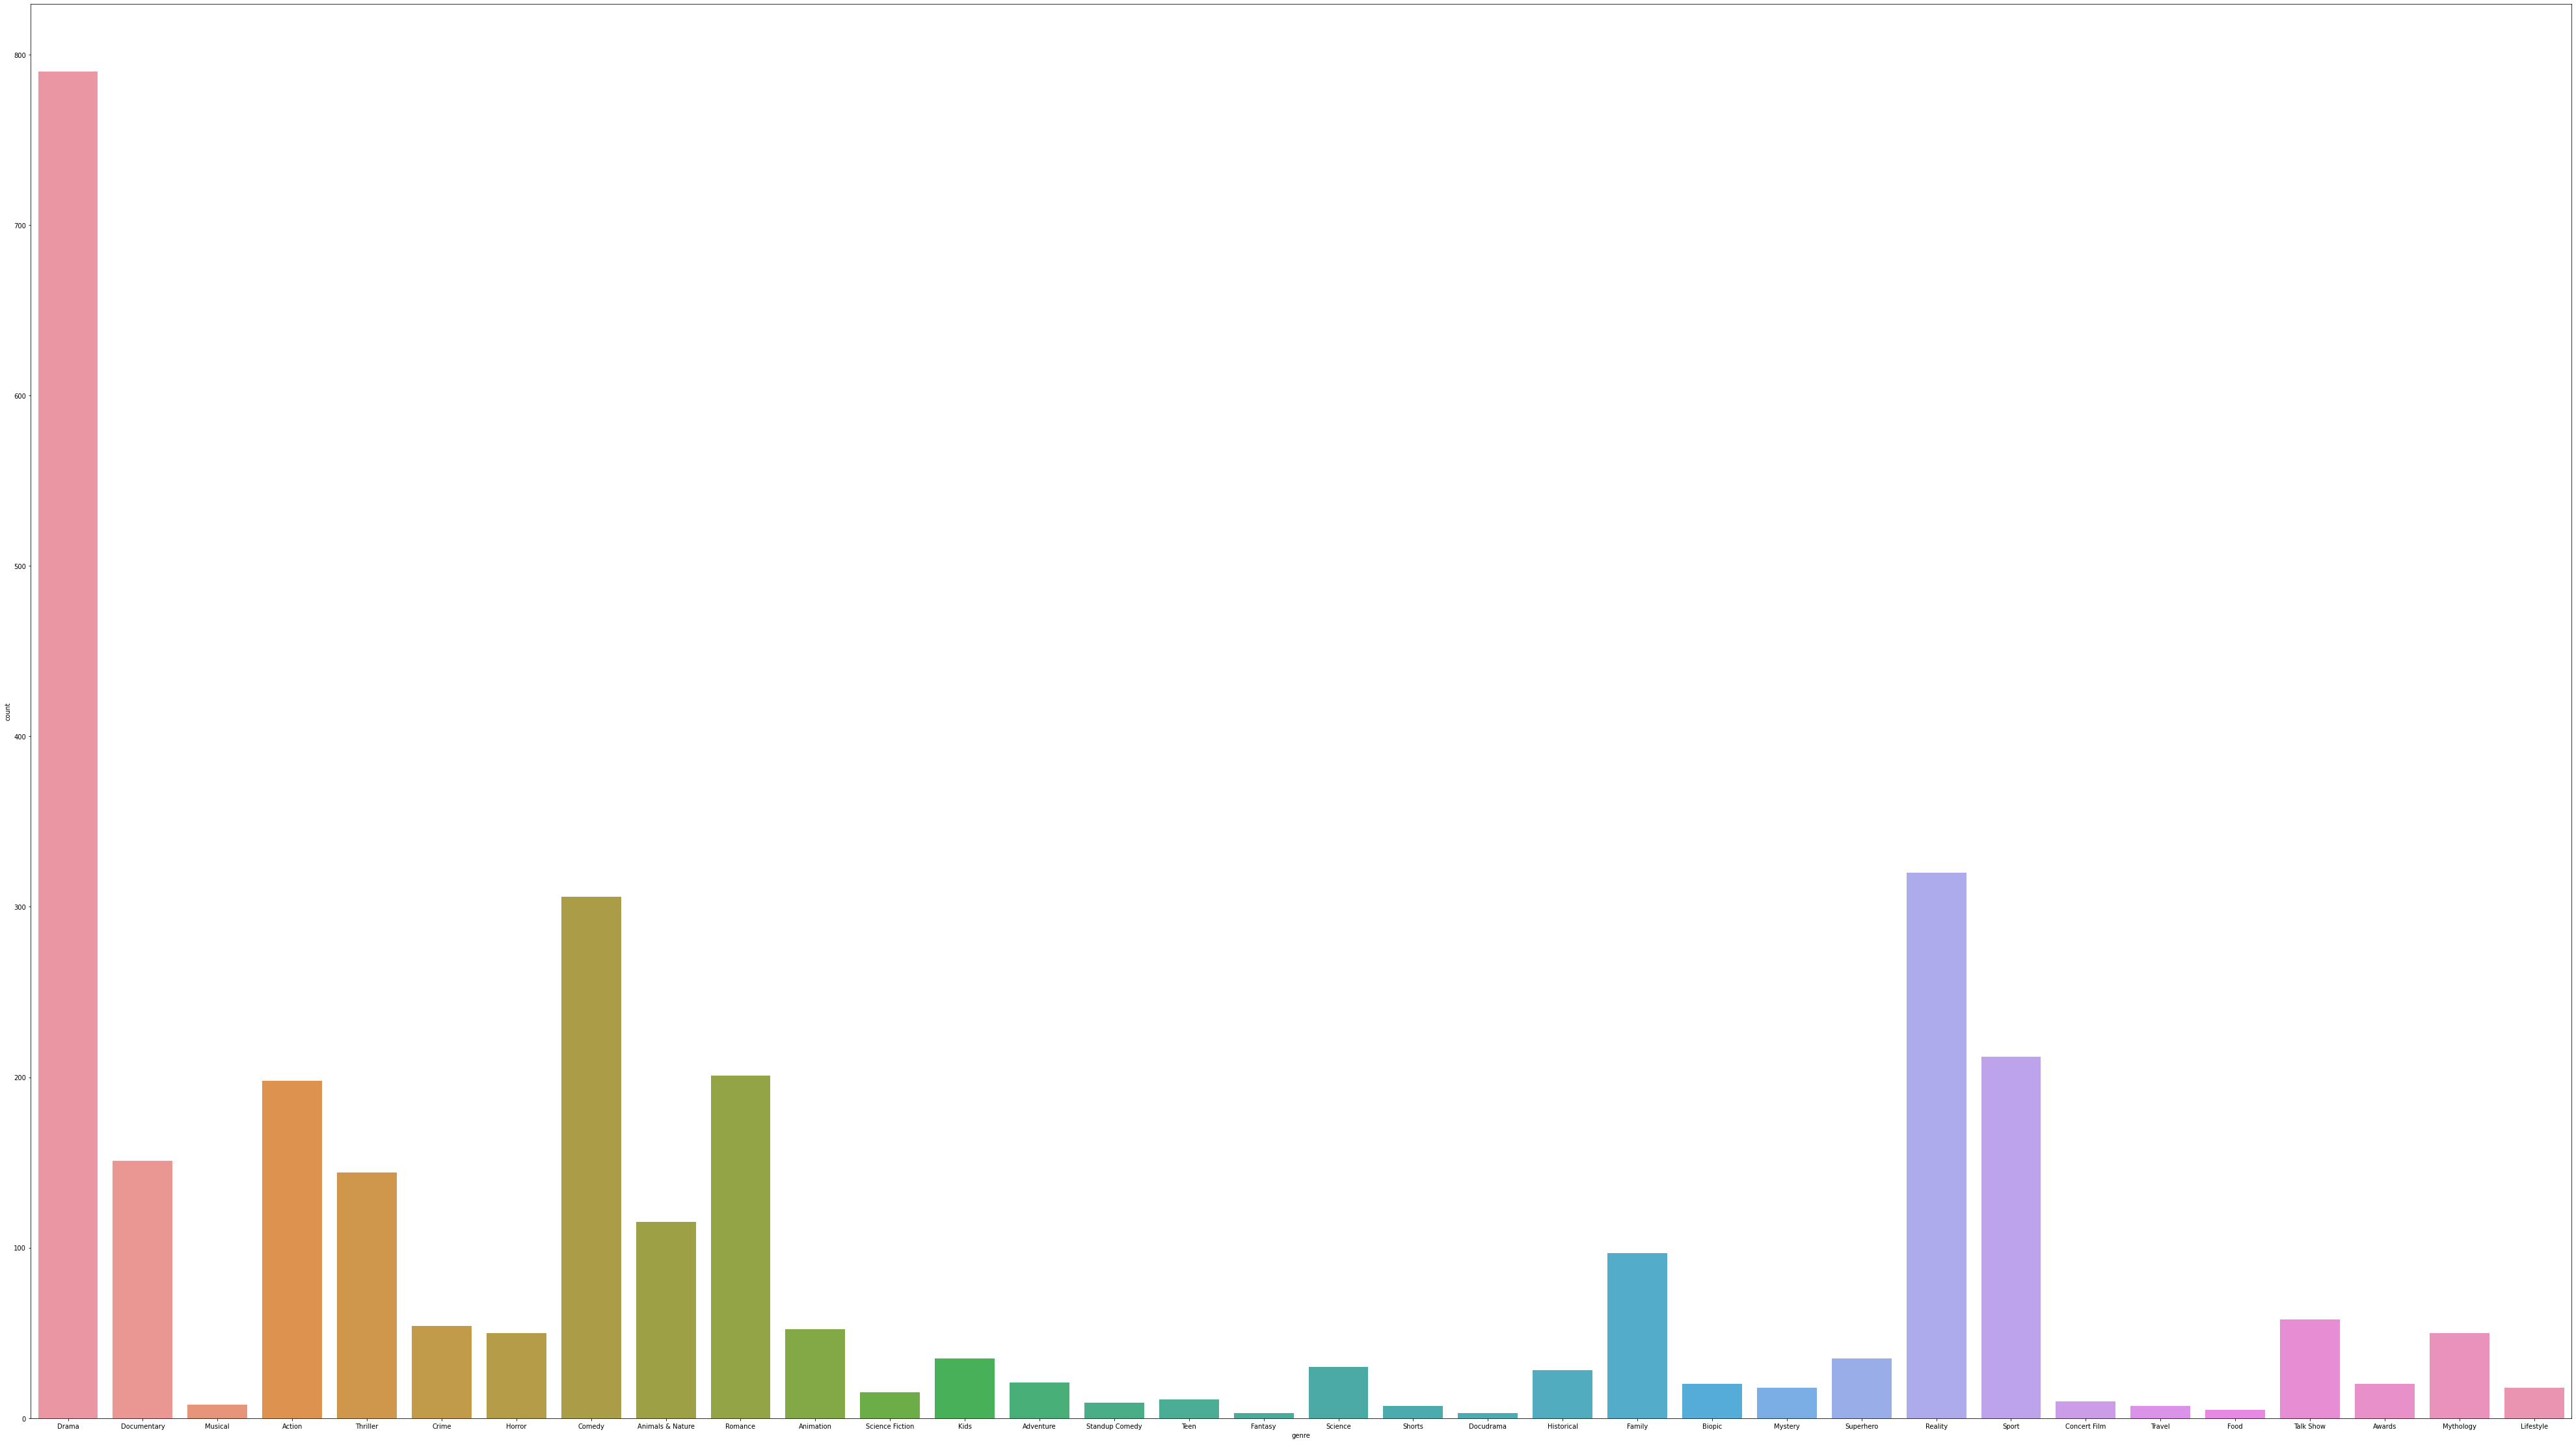

In [28]:
plt.figure(figsize=(70,40))
sns.countplot(df2["genre"])

While "drama" remained the biggest genre throughout time, "reality" saw a sharp rise in era 2 

In [29]:
d={}
for x in df["genre"].unique():
    d[x]=sum(df1[df1["genre"]==x].value_counts())-sum(df2[df2["genre"]==x].value_counts())
for c in d.keys():
    print(c,":",d[c])

Drama : 228
Documentary : -125
Superhero : -9
Musical : -1
Romance : 204
Family : 53
Action : 187
Kids : 34
Comedy : 142
Thriller : 27
Crime : -19
Horror : -4
Mythology : -24
Animals & Nature : -111
Adventure : 2
Animation : 119
Mystery : -10
Science Fiction : 8
Historical : -15
Standup Comedy : 33
Teen : 9
Fantasy : -3
Science : -26
Concert Film : -8
Shorts : -7
Docudrama : 0
Biopic : 0
Reality : -263
Sport : -209
Travel : -7
Food : -4
Talk Show : -36
Awards : -13
Kabaddi : 1
Lifestyle : -10


In [30]:
max(d.values())

228

In [31]:
min(d.values())

-263

The above result, if positive, shows decrease in trend of a particular genre while a negative result shows increase in a trend over time."Drama", though still in relevant size has fallen the most as a genre since 2016 while "reality" has risen up the most.

<AxesSubplot:ylabel='type'>

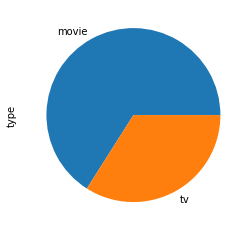

In [32]:
df["type"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='type'>

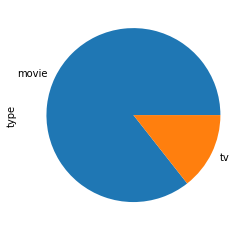

In [33]:
df1["type"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='type'>

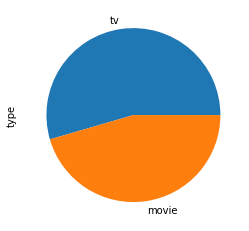

In [34]:
df2["type"].value_counts().plot(kind="pie")

This simply shows the drastic rise of tv series content over movies since 2016.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

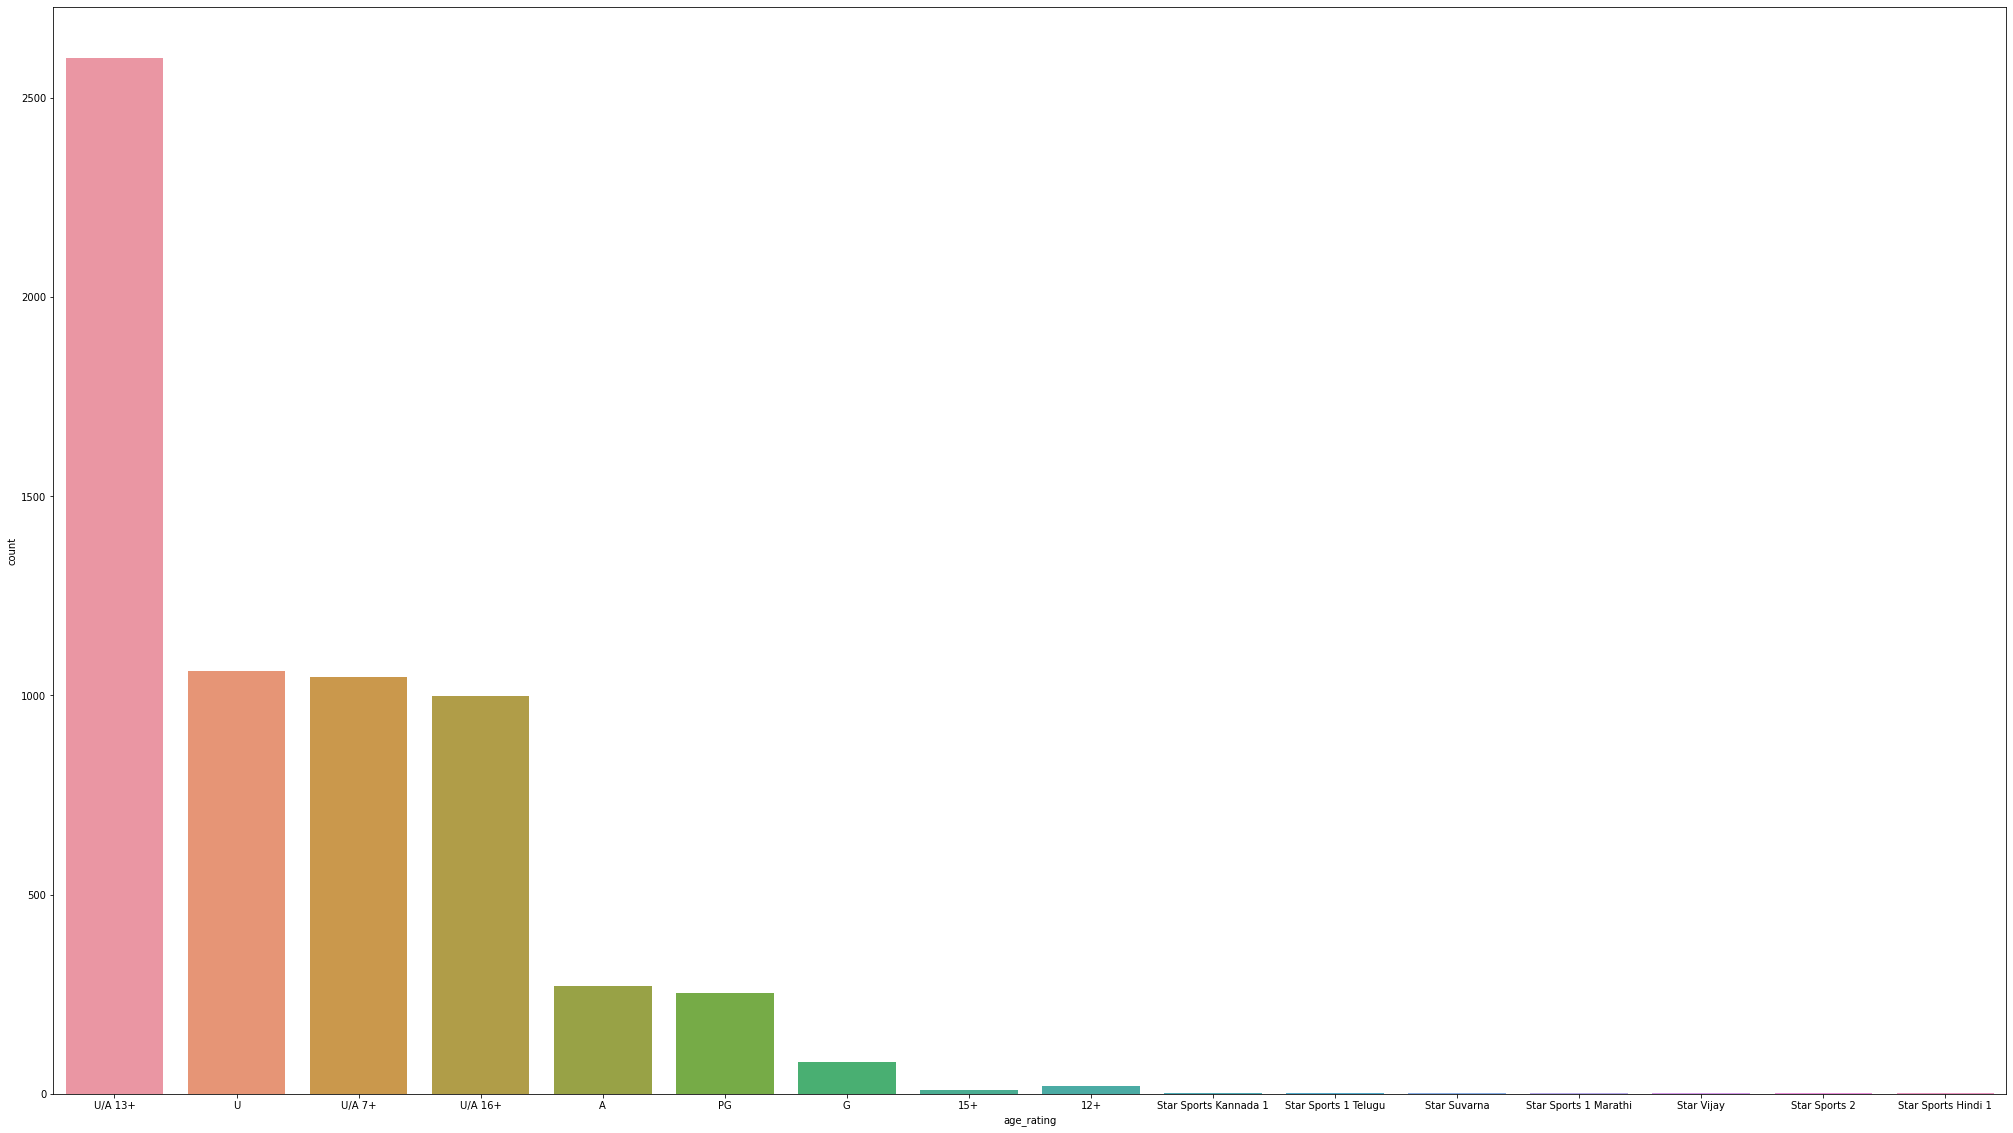

In [35]:
plt.figure(figsize=(35,20))
sns.countplot(df["age_rating"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

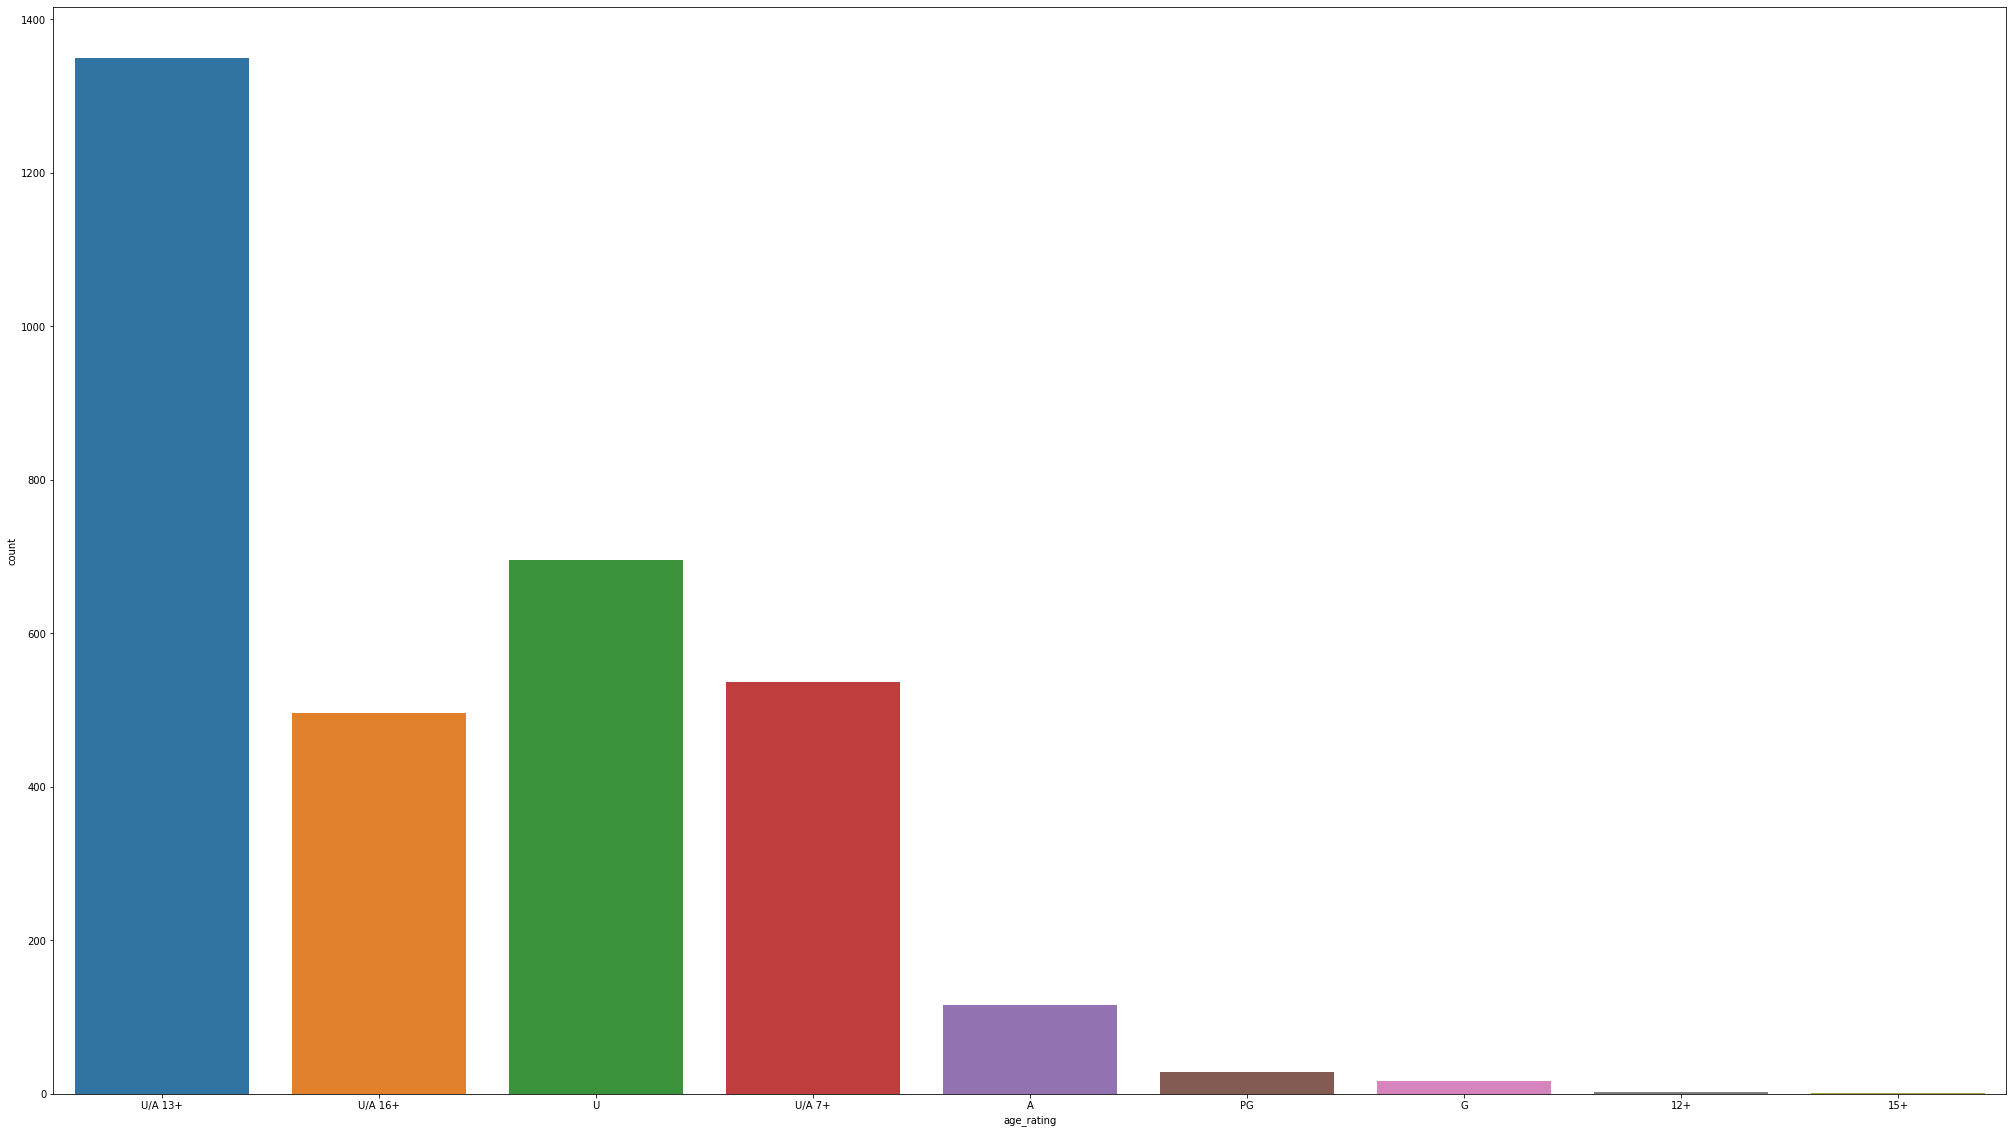

In [36]:
plt.figure(figsize=(35,20))
sns.countplot(df1["age_rating"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

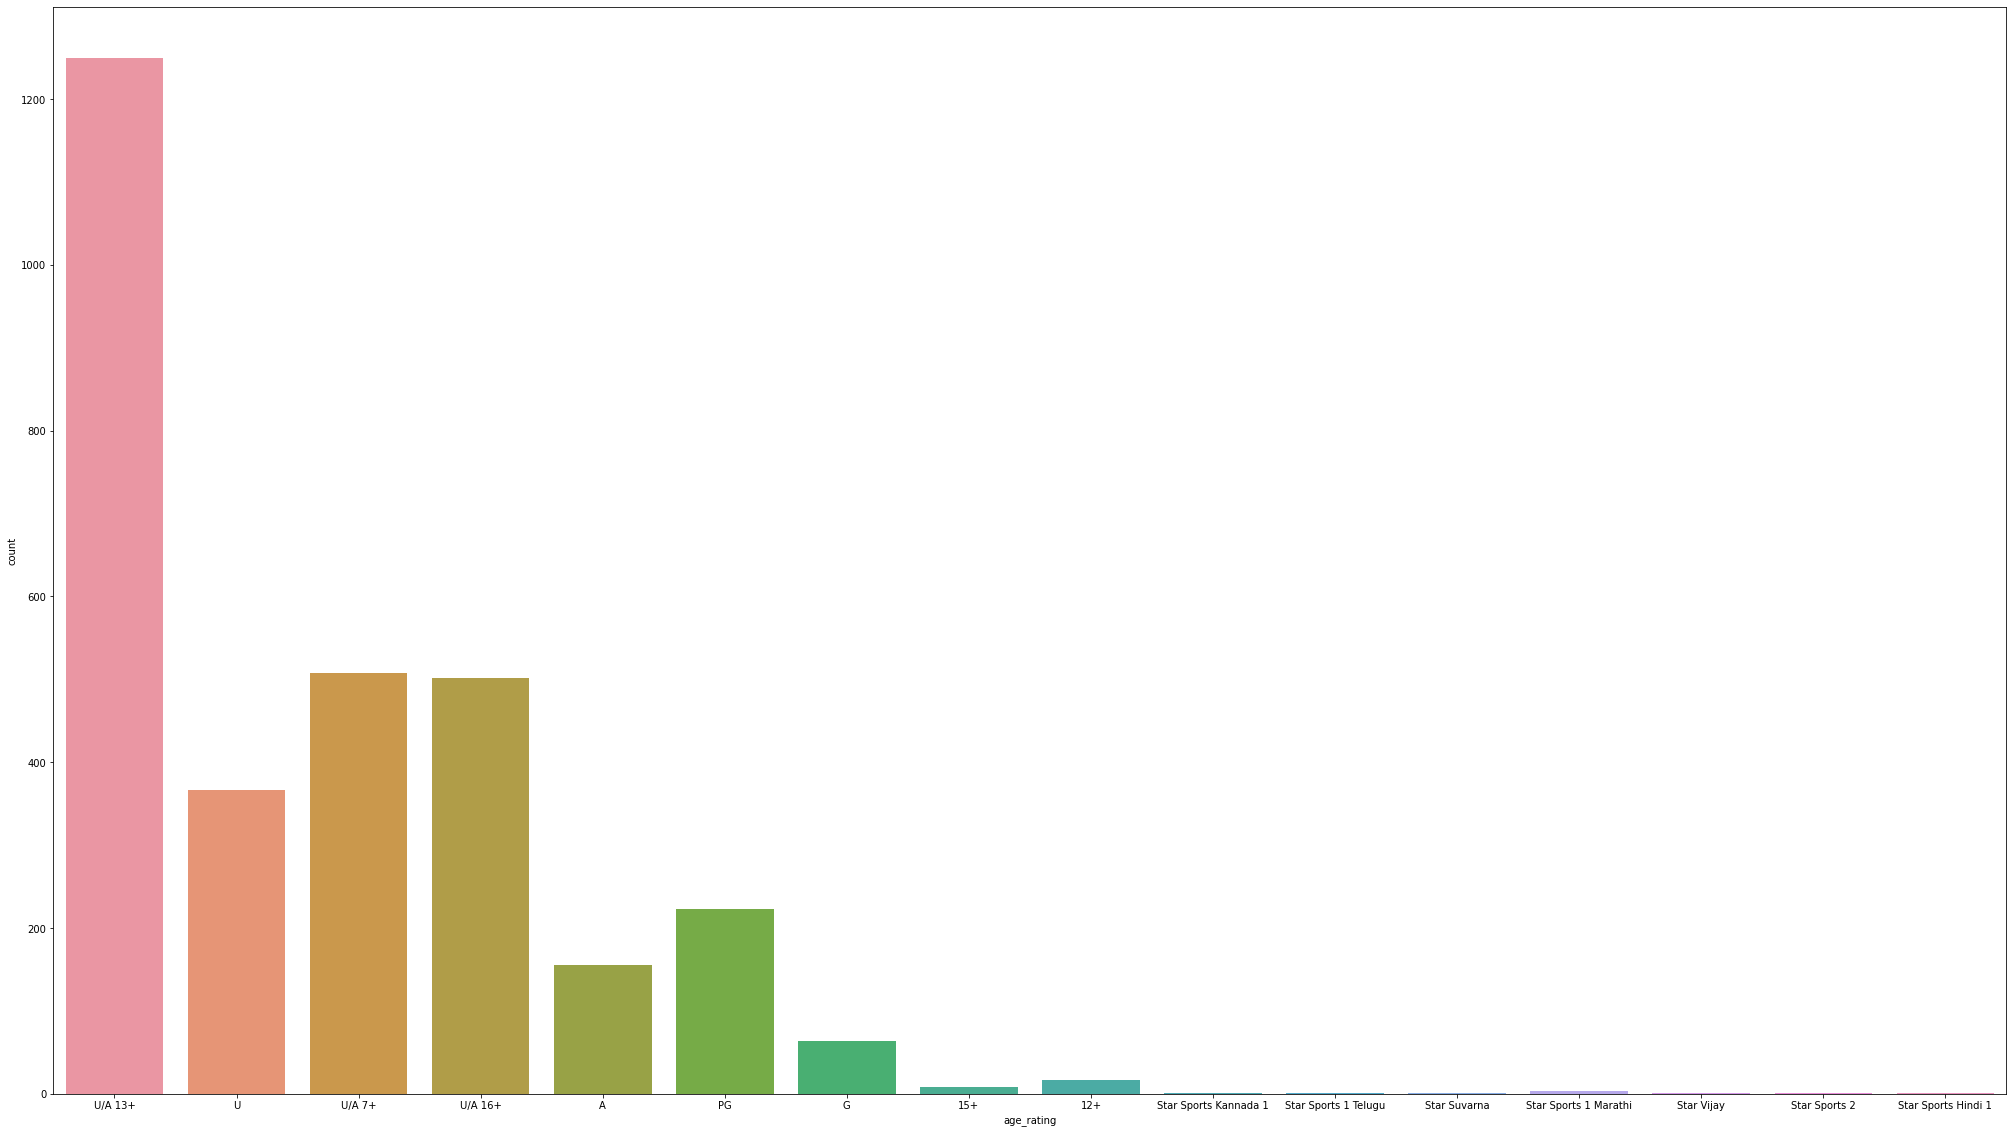

In [37]:
plt.figure(figsize=(35,20))
sns.countplot(df2["age_rating"])

In [38]:
d1={}
for x in df["age_rating"].unique():
    d1[x]=sum(df1[df1["age_rating"]==x].value_counts())-sum(df2[df2["age_rating"]==x].value_counts())
for c in d1.keys():
    print(c,":",d1[c])

U/A 13+ : 100
U : 330
U/A 7+ : 29
U/A 16+ : -6
A : -39
PG : -194
G : -47
15+ : -7
12+ : -14
Star Sports Kannada 1 : -1
Star Sports 1 Telugu : -1
Star Suvarna : -1
Star Sports 1 Marathi : -3
Star Vijay : -1
Star Sports 2 : -1
Star Sports Hindi 1 : -1


This shows the rise of A,G and PG content and fall of 13+,U and 7+ content. Overall, most available content is of U/A 13+, but this analysis has shown the rise of adult content over time

In [39]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [40]:
print(stopwords)

{'themselves', 'once', 'get', 'him', "let's", 'has', 'so', 'what', "aren't", 'k', "didn't", 'until', 'itself', "haven't", 'could', "shouldn't", "hasn't", 'their', "can't", 'up', 'further', "i'll", 'herself', 'i', "it's", 'also', 'but', 'that', 'your', 'or', "we'll", 'in', 'under', 'after', 'are', 'being', "wasn't", 'its', "don't", 'therefore', 'as', 'he', 'against', 'do', 'be', "that's", "she'll", 'than', 'our', "they've", 'ours', 'at', 'why', "she's", 'have', "we're", "you'll", 'below', 'any', "i'd", "mustn't", 'she', 'because', "he'll", "i've", 'out', 'theirs', 'too', "they'd", 'how', 'from', 'between', 'if', 'about', 'only', 'all', 'yours', 'were', 'here', 'having', 'would', "weren't", 'com', 'by', 'again', 'hence', 'http', 'shall', 'each', 'does', 'off', 'r', 'www', 'since', 'am', "you'd", "here's", 'few', 'more', "doesn't", 'an', "hadn't", "isn't", 'yourself', "they're", 'and', 'myself', 'through', 'we', 'you', 'her', 'doing', 'then', "there's", 'on', 'most', 'they', "shan't", "he

In [41]:
doc_overall=[]
for i in df["description"]:
    y=i.split(" ")
    doc_overall.extend([z for z in y if z not in stopwords])
    

In [42]:
doc_1=[]
for i in df1["description"]:
    y=i.split(" ")
    doc_1.extend([z for z in y if z not in stopwords])

In [43]:
doc_2=[]
for i in df2["description"]:
    y=i.split(" ")
    doc_2.extend([z for z in y if z not in stopwords])

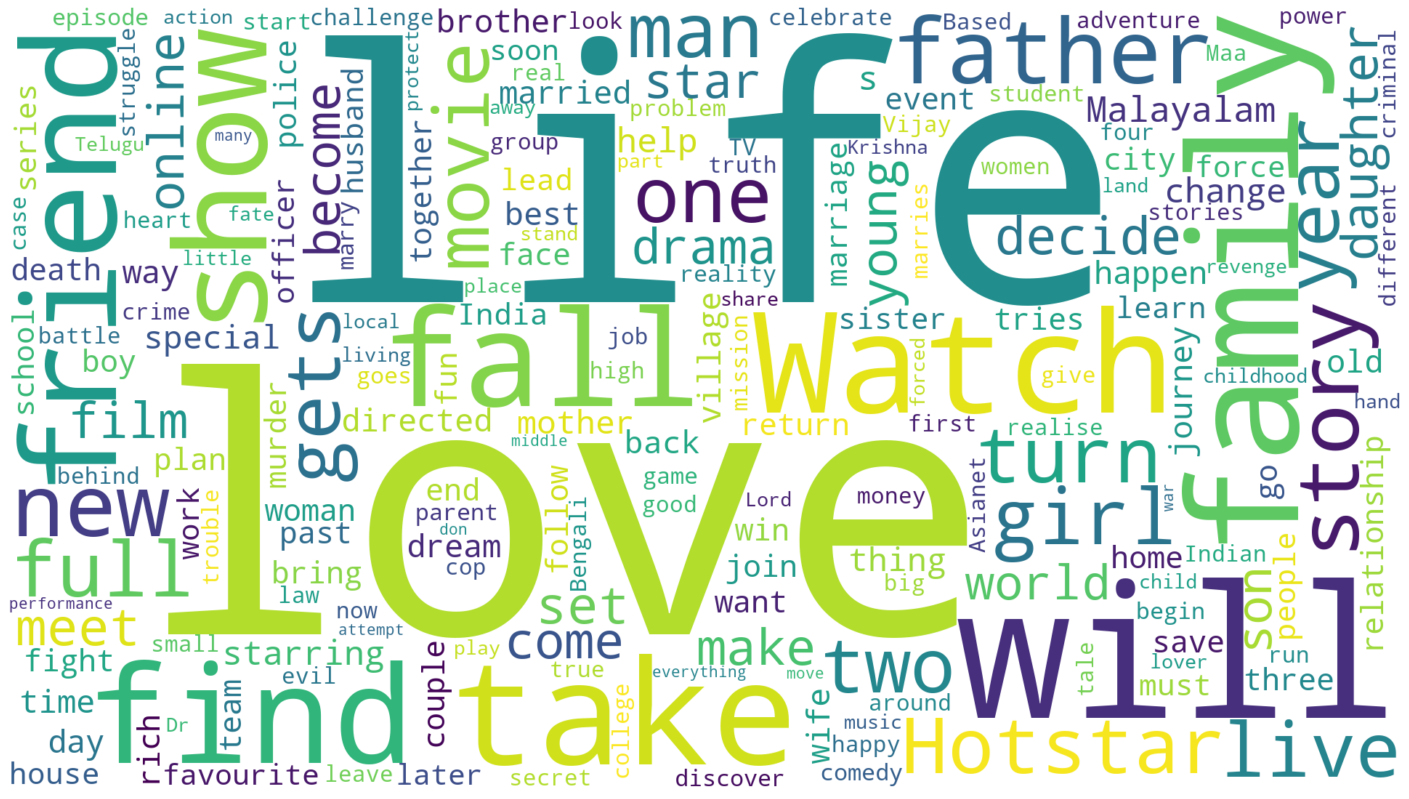

In [44]:
plt.figure(figsize=(25,15))
word_cloud_overall = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_overall))
plt.imshow(word_cloud_overall, interpolation='bilinear')
plt.axis("off")
plt.show()

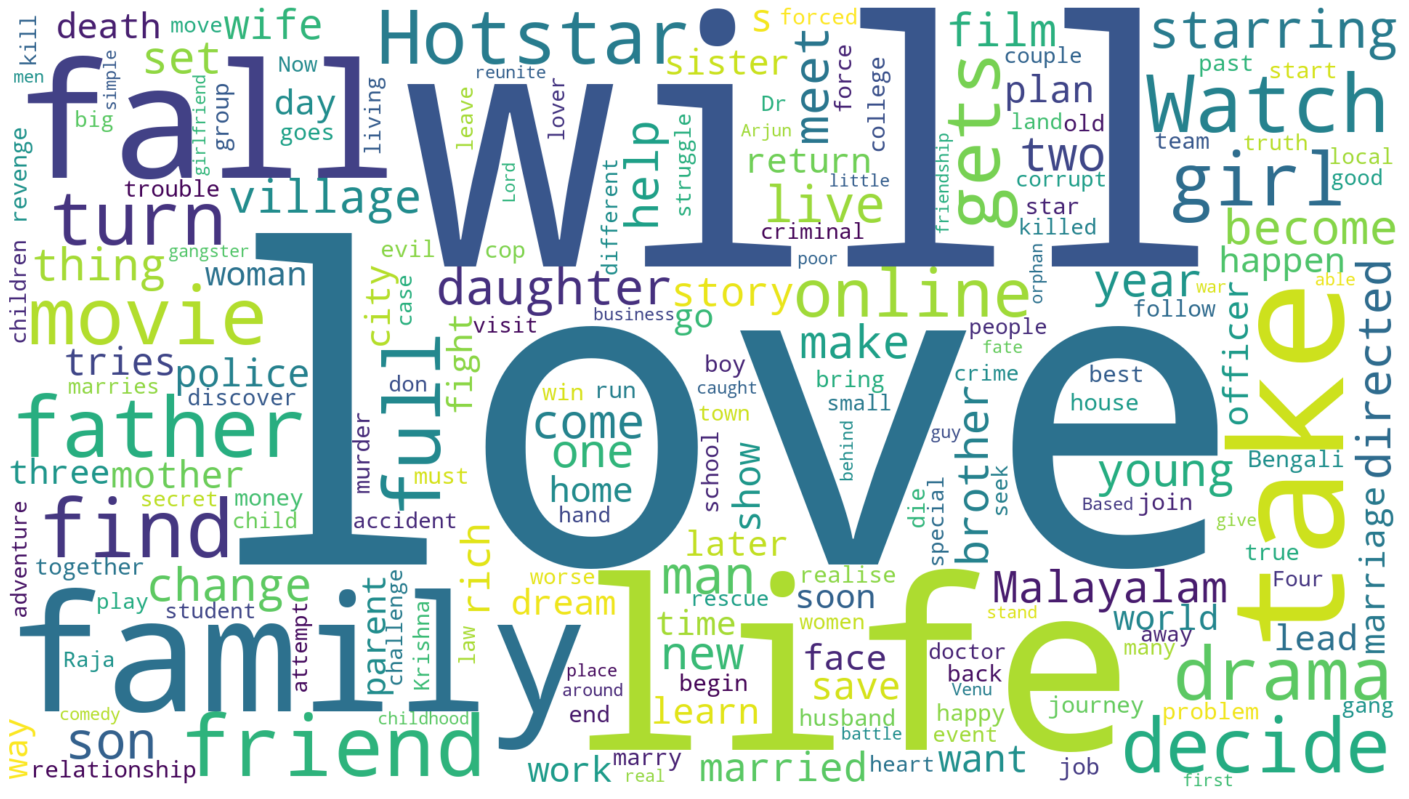

In [45]:
plt.figure(figsize=(25,15))
word_cloud_1 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_1))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

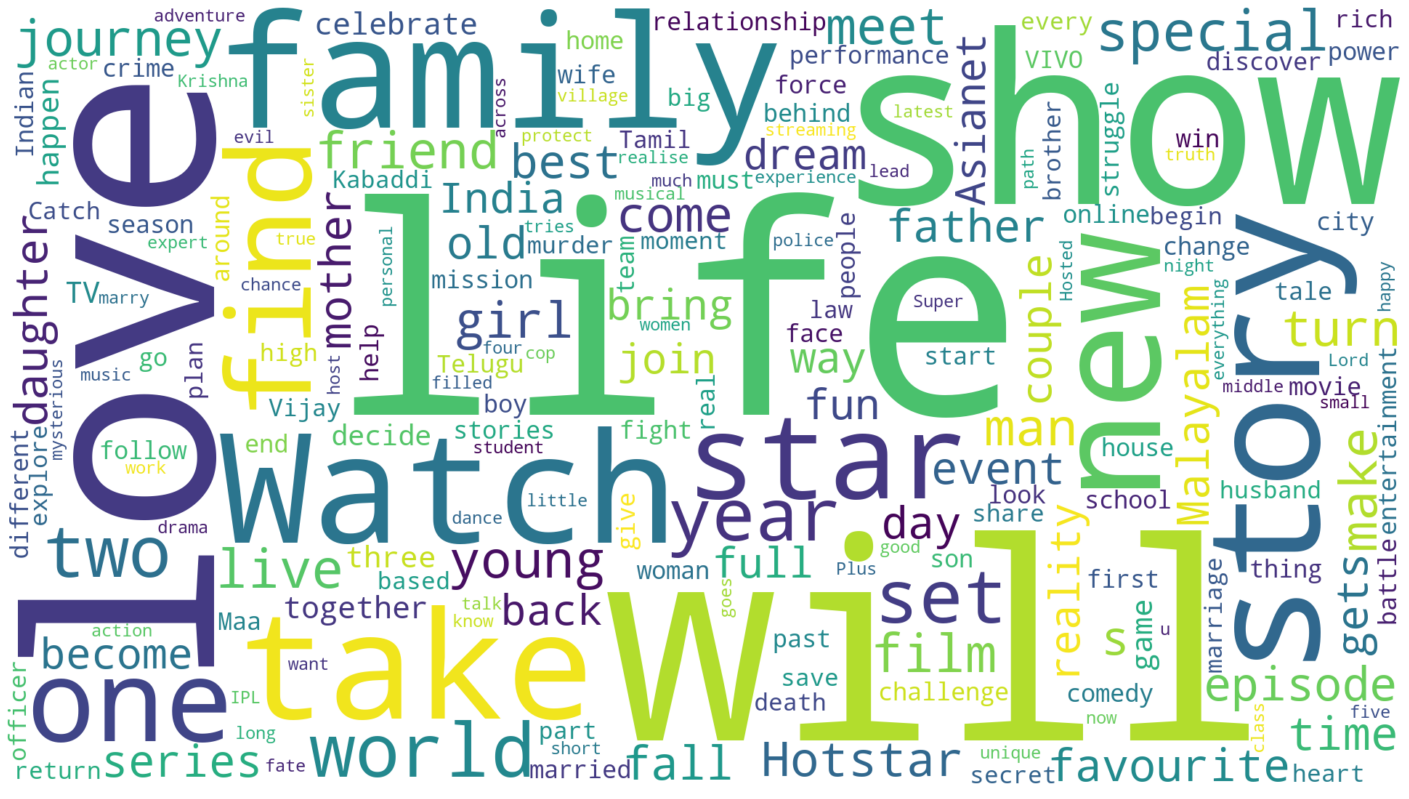

In [46]:
plt.figure(figsize=(25,15))
word_cloud_2 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_2))
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

Overall dominant words in description are "Love","life","will","family" and "watch". However, "love" as a trend seems to be drastically decreasing since 2016 and "life","story" have grown frequency. Rest all almost have remained the same during time

Now, let us do one more experimentation, which remains, i.e movies vs tv series. So we are gonna make a split for movies vs web series, since we haven't explored this aspect in detail.

In [47]:
df_movies=df[df["type"]=="movie"]
df_series=df[df["type"]=="tv"]

Note: Since we already discovered through previous analytics that web series have mainly dominated in era 2 and movies were pre dominant in era 1, we don't need to split df1 and df2 further, just one split will do

In [48]:
d_movie_tv={}
for x in df["age_rating"].unique():
    d_movie_tv[x]=sum(df_movies[df_movies["age_rating"]==x].value_counts())-sum(df_series[df_series["age_rating"]==x].value_counts())
for c in d_movie_tv.keys():
    print(c,":",d_movie_tv[c])

U/A 13+ : 712
U : 648
U/A 7+ : 411
U/A 16+ : 606
A : 25
PG : -252
G : -81
15+ : -9
12+ : -20
Star Sports Kannada 1 : -1
Star Sports 1 Telugu : -1
Star Suvarna : -1
Star Sports 1 Marathi : -3
Star Vijay : -1
Star Sports 2 : -1
Star Sports Hindi 1 : -1


We can see that web series are tending to cater the mature audience more. The results might seem skewed cause movies are more in count

In [49]:
d_movie_tv2={}
for x in df["genre"].unique():
    d_movie_tv2[x]=sum(df_movies[df_movies["genre"]==x].value_counts())-sum(df_series[df_series["genre"]==x].value_counts())
for c in d_movie_tv2.keys():
    print(c,":",d_movie_tv2[c])

Drama : 902
Documentary : 71
Superhero : 27
Musical : 13
Romance : 328
Family : 47
Action : 487
Kids : -8
Comedy : 252
Thriller : 233
Crime : 11
Horror : 68
Mythology : -46
Animals & Nature : -13
Adventure : 36
Animation : 219
Mystery : 18
Science Fiction : 34
Historical : 21
Standup Comedy : 47
Teen : -9
Fantasy : 3
Science : 6
Concert Film : -8
Shorts : -5
Docudrama : -2
Biopic : 30
Reality : -375
Sport : -211
Travel : -5
Food : -6
Talk Show : -80
Awards : -27
Kabaddi : -1
Lifestyle : -26


Some prominent genres in web series are "reality" and "sport". We can also conclude from this that there is a sharp rise in "reality" and "sport" genre in web series since 2016

In [50]:
doc_movie=[]
for i in df_movies["description"]:
    y=i.split(" ")
    doc_movie.extend([z for z in y if z not in stopwords])

In [51]:
doc_series=[]
for i in df_series["description"]:
    y=i.split(" ")
    doc_series.extend([z for z in y if z not in stopwords])

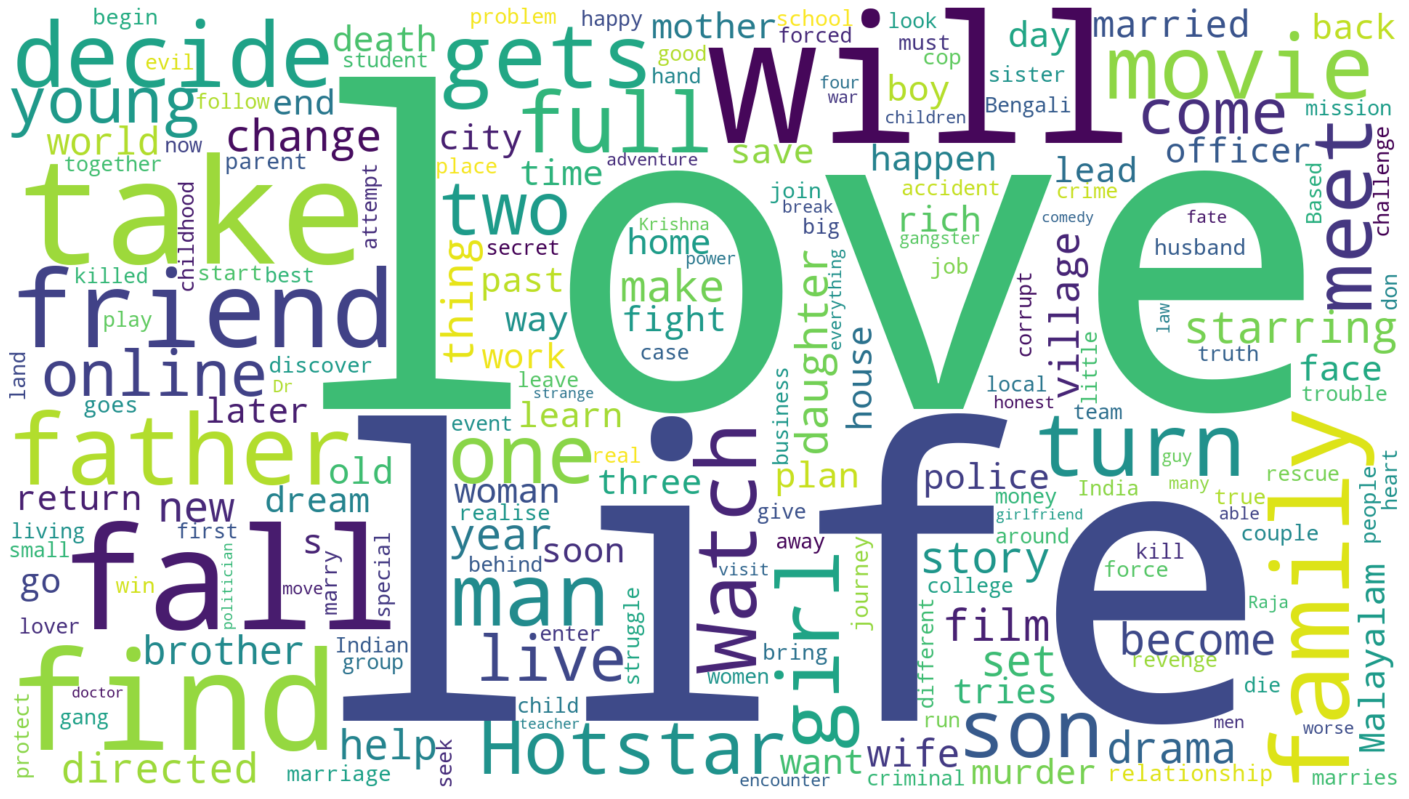

In [52]:
plt.figure(figsize=(25,15))
word_cloud_movie = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_movie))
plt.imshow(word_cloud_movie, interpolation='bilinear')
plt.axis("off")
plt.show()

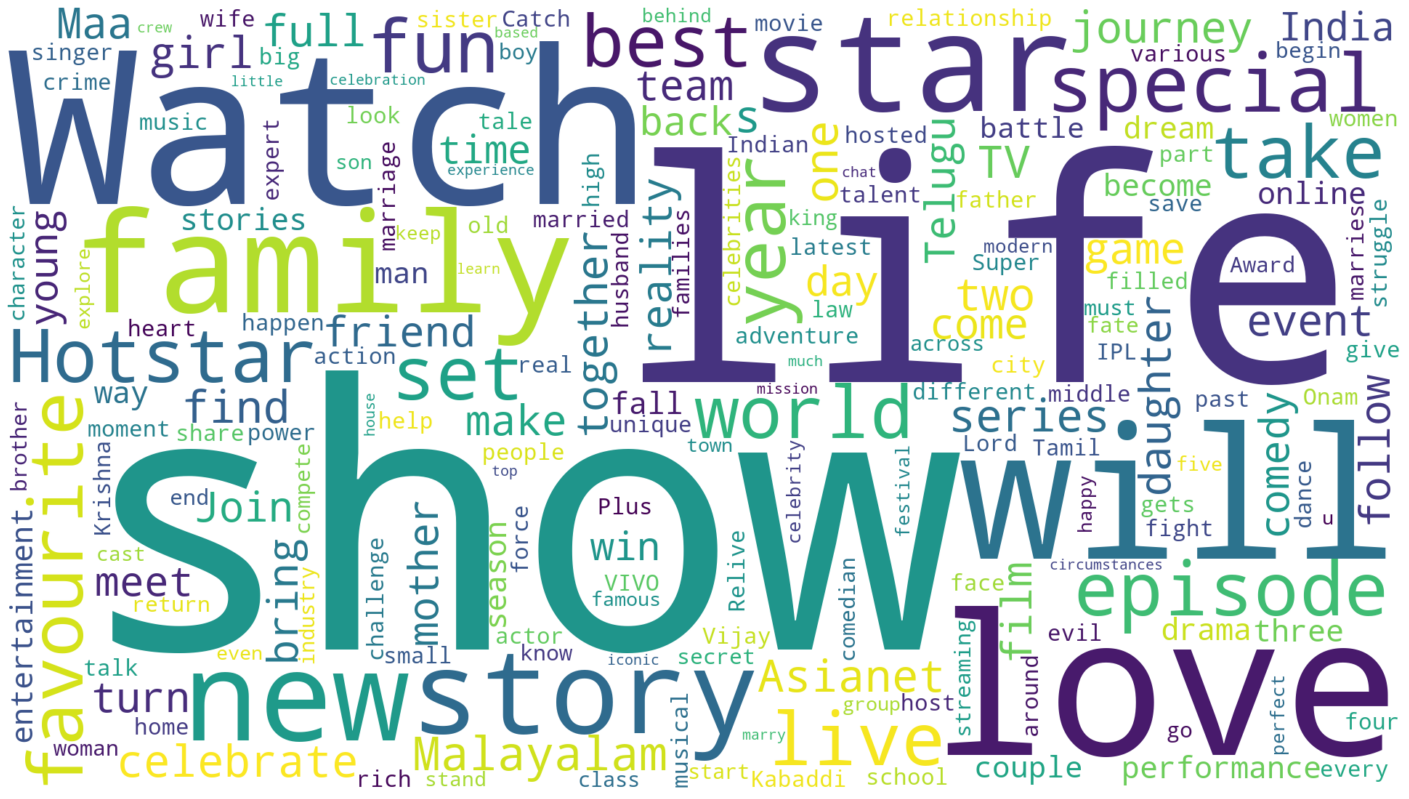

In [53]:
plt.figure(figsize=(25,15))
word_cloud_series = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_series))
plt.imshow(word_cloud_series, interpolation='bilinear')
plt.axis("off")
plt.show()

Thank you :)